PIPELINE 1: DATASET BAN ĐẦU -> SVM

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = pd.read_csv('../clean.csv') 

In [2]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


Phân tách đặc trưng và biến mục tiêu

In [3]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

Chuẩn hóa dữ liệu

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
print(X_scaled[:5])

[[ 0.29889263 -0.26147045  0.2174012  -0.14480303 -0.49197217 -0.17881927
  -0.50641126  1.61489628 -2.13746929  0.83924152 -1.55566209 -0.81060135
  -0.16220995 -0.06339327 -0.08745646 -1.09503276 -0.78813999]
 [ 0.29889263 -0.26147045  1.36599262  0.56397175  2.37030377 -0.17881927
  -0.50641126 -0.93370069  0.46784298  1.16499011 -1.0980133   0.65669226
  -0.16220995 -0.06339327 -0.08745646  0.09280591  0.48376045]
 [-1.62897546 -0.26147045  1.36599262 -0.85357781 -0.49197217 -0.17881927
  -0.50641126 -0.98025041  0.46784298 -1.76674722  1.41905503  0.65669226
  -0.16220995 -0.06339327 -0.08745646 -1.2375278  -0.78813999]
 [ 0.29889263 -0.26147045 -0.93119021 -0.14480303 -0.49197217 -0.17881927
  -0.50641126  1.4636097   0.46784298 -0.78950144  0.50375745  0.65669226
  -0.16220995 -0.06339327 -0.08745646 -0.09756747 -0.78813999]
 [ 0.29889263 -0.26147045  0.2174012  -0.85357781  2.37030377 -0.17881927
  -0.50641126 -0.43329124  0.46784298 -1.11525003 -0.52595232  0.65669226
  -0.162

In [6]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  3.627500e+04    3.627500e+04          3.627500e+04       3.627500e+04   
mean   4.270112e-17    1.518044e-17          9.950536e-17      -1.165466e-16   
std    1.000014e+00    1.000014e+00          1.000014e+00       1.000014e+00   
min   -3.556844e+00   -2.614704e-01         -9.311902e-01      -1.562353e+00   
25%    2.988926e-01   -2.614704e-01         -9.311902e-01      -8.535778e-01   
50%    2.988926e-01   -2.614704e-01          2.174012e-01      -1.448030e-01   
75%    2.988926e-01   -2.614704e-01          1.365993e+00       5.639718e-01   
max    4.154629e+00    2.457446e+01          7.108950e+00       1.048682e+01   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
count       3.627500e+04                3.627500e+04        3.627500e+04   
mean       -1.527838e-16                3.917534e-17       -5.876301e-19   
std         1.000014e+00                1.000014e+0

Chia tập train, set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (29020, 17)
X_test shape: (7255, 17)
y_train shape: (29020,)
y_test shape: (7255,)


Train model

In [8]:
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

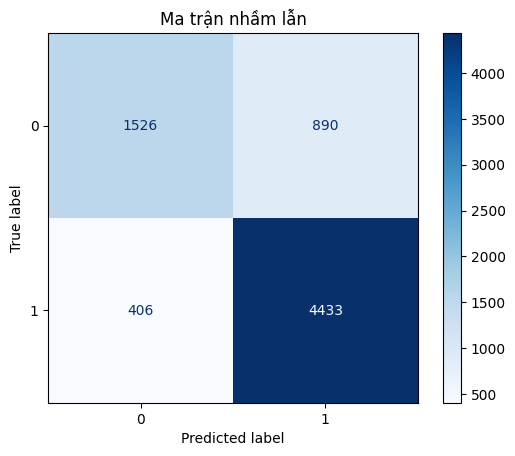

Kết quả:

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      2416
           1       0.83      0.92      0.87      4839

    accuracy                           0.82      7255
   macro avg       0.81      0.77      0.79      7255
weighted avg       0.82      0.82      0.82      7255



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.grid(False)
plt.show()

print("Kết quả:\n")
print(classification_report(y_test, y_pred))